In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Customer Code,Employee Index,Country,Gender,Age,New Customer,Customer Seniority(months),Customer type,Customer relation type,Residence index,Foreigner index,Channel joined,Province,Gross Income
0,1375586,N,ES,F,35,0,6,1,A,S,N,KHL,MALAGA,87218.10000
1,1050611,N,ES,M,23,0,35,1,I,S,S,KHE,CIUDAD REAL,35548.74000
2,1050612,N,ES,M,23,0,35,1,I,S,N,KHE,CIUDAD REAL,122179.11000
3,1050613,N,ES,F,22,0,35,1,I,S,N,KHD,ZARAGOZA,119775.54000
4,1050614,N,ES,M,23,0,35,1,A,S,N,KHE,ZARAGOZA,139646.15094


In [4]:
emp_index = df['Employee Index'].unique()
for index in emp_index:
    print(index,':',len(df[df['Employee Index'] == index]))

N : 981145
A : 285
F : 282
B : 385
S : 2


In [5]:
country = df['Country'].unique()
for c in country:
    print(c,':',len(df[df['Country'] == c]))

ES : 982089
IT : 4
DE : 2
BO : 2
PY : 2


Employee index mostly consists of Non employees and Maximum number of customers are from Spain, therefore these column will not be very useful in clustering, as they will introduce bias, and can thus be removed.

In [6]:
df = df.drop(columns=['Employee Index', 'Country'])

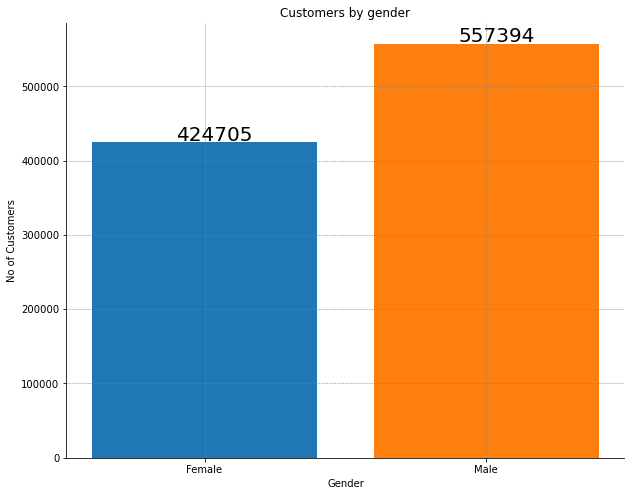

In [7]:
fig,ax = plt.subplots()

x = df['Gender'].unique()

rects1 = ax.bar('Female',len(df[df['Gender'] == 'F']))
rects2 = ax.bar('Male',len(df[df['Gender'] == 'M']))

fig.set_figheight(8)
fig.set_figwidth(10)

ax.set_ylabel('No of Customers')
ax.set_title('Customers by gender')
ax.set_xlabel('Gender') 
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
#ax.set_yticklabels([])

for index,data in enumerate([len(df[df['Gender'] == 'F']), len(df[df['Gender'] == 'M'])]):
    plt.text(x=index-0.1 , y =data+2000 , s=data , fontdict=dict(fontsize=20))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.show()

Number of Male and Female Customers.

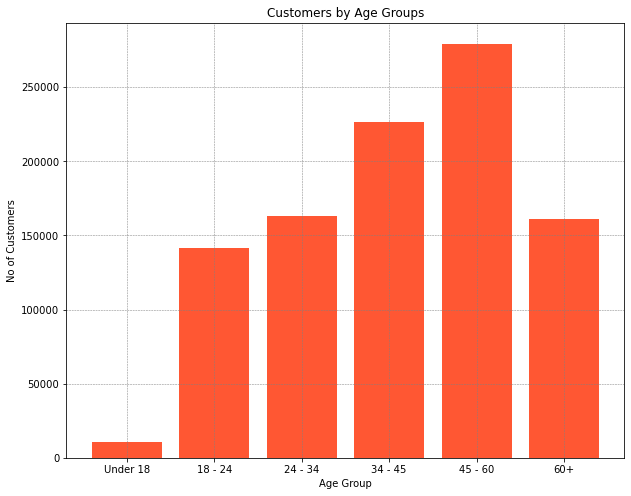

In [8]:
fig,ax = plt.subplots()


rects1 = ax.bar('Under 18',len(df[df['Age'] < 18]), color = '#FF5733')
rects2 = ax.bar('18 - 24',len(df[(df['Age'] >= 18) & (df['Age'] <24)]), color = '#FF5733')
rects3 = ax.bar('24 - 34',len(df[(df['Age'] >= 24) & (df['Age'] <34)]), color = '#FF5733')
rects4 = ax.bar('34 - 45',len(df[(df['Age'] >= 34) & (df['Age'] <45)]), color = '#FF5733')
rects5 = ax.bar('45 - 60',len(df[(df['Age'] >= 45) & (df['Age'] <60)]), color = '#FF5733')
rects6 = ax.bar('60+',len(df[df['Age'] >= 60]), color='#FF5733')

fig.set_figheight(8)
fig.set_figwidth(10)

ax.set_ylabel('No of Customers')
ax.set_title('Customers by Age Groups')
ax.set_xlabel('Age Group') 
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

The maximum amount of customers are in the age group of 45-60.

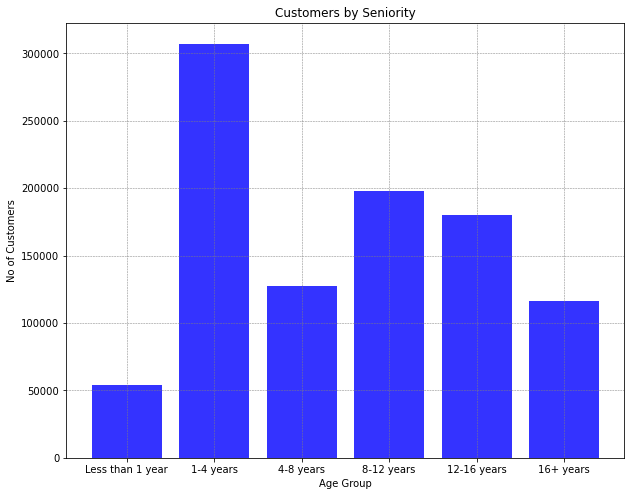

In [9]:
fig,ax = plt.subplots()


rects1 = ax.bar('Less than 1 year',len(df[(df['Customer Seniority(months)'] < 12)]), color='#3433FF')
rects2 = ax.bar('1-4 years',len(df[(df['Customer Seniority(months)'] >= 12) & (df['Customer Seniority(months)'] < 48)]), color='#3433FF')
rects3 = ax.bar('4-8 years',len(df[(df['Customer Seniority(months)'] >= 48) & (df['Customer Seniority(months)'] < 96)]), color='#3433FF')
rects4 = ax.bar('8-12 years',len(df[(df['Customer Seniority(months)'] >= 96) & (df['Customer Seniority(months)'] < 144)]), color='#3433FF')
rects5 = ax.bar('12-16 years',len(df[(df['Customer Seniority(months)'] >= 144) & (df['Customer Seniority(months)'] < 180)]), color='#3433FF')
rects6 = ax.bar('16+ years',len(df[(df['Customer Seniority(months)'] >= 180)]), color='#3433FF')

fig.set_figheight(8)
fig.set_figwidth(10)

ax.set_ylabel('No of Customers')
ax.set_title('Customers by Seniority')
ax.set_xlabel('Age Group') 
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

Customer Seniority Distribution, as we can see most of the customers joined 1-4 years ago.

In [10]:
xa = df['Customer type'].unique()
for x in xa:
    print(x, ':', len(df[df['Customer type'] == x]))

1 : 982095
2 : 2
3 : 2


Most of the customers are primary customers threfore this column can be removed as it wont contribute much ffor clustering.

In [11]:
df = df.drop(columns=['Customer type'])

In [12]:
df.head()

,Customer Code,Gender,Age,New Customer,Customer Seniority(months),Customer relation type,Residence index,Foreigner index,Channel joined,Province,Gross Income
0,1375586,F,35,0,6,A,S,N,KHL,MALAGA,87218.10000
1,1050611,M,23,0,35,I,S,S,KHE,CIUDAD REAL,35548.74000
2,1050612,M,23,0,35,I,S,N,KHE,CIUDAD REAL,122179.11000
3,1050613,F,22,0,35,I,S,N,KHD,ZARAGOZA,119775.54000
4,1050614,M,23,0,35,A,S,N,KHE,ZARAGOZA,139646.15094


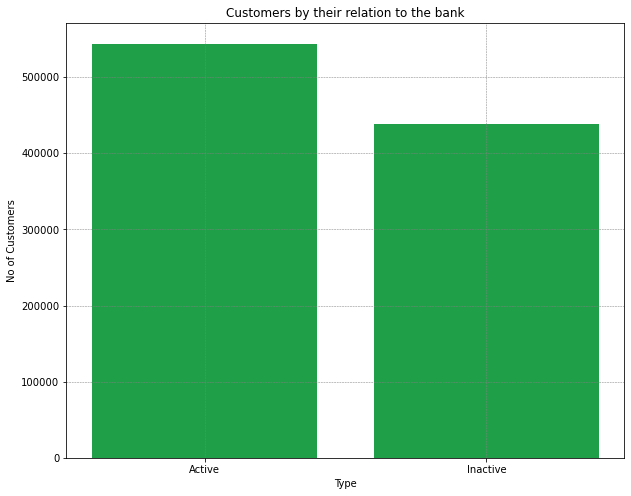

In [13]:
fig,ax = plt.subplots()


rects1 = ax.bar('Active',len(df[(df['Customer relation type'] == 'A')]), color='#1FA048')
rects2 = ax.bar('Inactive',len(df[(df['Customer relation type'] == 'I')]), color='#1FA048')

fig.set_figheight(8)
fig.set_figwidth(10)

ax.set_ylabel('No of Customers')
ax.set_title('Customers by their relation to the bank')
ax.set_xlabel('Type') 
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

There are more active customers than inactive customers

In [14]:
df.head()

,Customer Code,Gender,Age,New Customer,Customer Seniority(months),Customer relation type,Residence index,Foreigner index,Channel joined,Province,Gross Income
0,1375586,F,35,0,6,A,S,N,KHL,MALAGA,87218.10000
1,1050611,M,23,0,35,I,S,S,KHE,CIUDAD REAL,35548.74000
2,1050612,M,23,0,35,I,S,N,KHE,CIUDAD REAL,122179.11000
3,1050613,F,22,0,35,I,S,N,KHD,ZARAGOZA,119775.54000
4,1050614,M,23,0,35,A,S,N,KHE,ZARAGOZA,139646.15094


In [15]:
xa = df['Residence index'].unique()
for x in xa:
    print(x, ':', len(df[df['Residence index'] == x]))

S : 982089
N : 10


Majority of the customers are living in Spain so this column can be removed.

In [16]:
df = df.drop(columns=['Residence index'])

In [17]:
xa = df['Foreigner index'].unique()
for x in xa:
    print(x, ':', len(df[df['Foreigner index'] == x]))

N : 944819
S : 37280


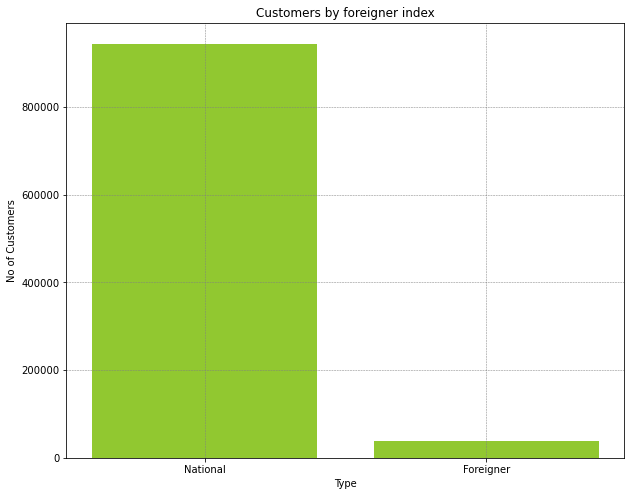

In [18]:
fig,ax = plt.subplots()


rects1 = ax.bar('National',len(df[(df['Foreigner index'] == 'N')]), color='#91C830')
rects2 = ax.bar('Foreigner',len(df[(df['Foreigner index'] == 'S')]), color='#91C830')

fig.set_figheight(8)
fig.set_figwidth(10)

ax.set_ylabel('No of Customers')
ax.set_title('Customers by foreigner index')
ax.set_xlabel('Type') 
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

This column is unbalenced as well so the best course of action will be to remove it.

In [19]:
df = df.drop(columns=['Foreigner index'])

In [20]:
df.head()

,Customer Code,Gender,Age,New Customer,Customer Seniority(months),Customer relation type,Channel joined,Province,Gross Income
0,1375586,F,35,0,6,A,KHL,MALAGA,87218.10000
1,1050611,M,23,0,35,I,KHE,CIUDAD REAL,35548.74000
2,1050612,M,23,0,35,I,KHE,CIUDAD REAL,122179.11000
3,1050613,F,22,0,35,I,KHD,ZARAGOZA,119775.54000
4,1050614,M,23,0,35,A,KHE,ZARAGOZA,139646.15094


In [21]:
xa = df['Channel joined'].unique()
for x in xa:
    print(x, ':', len(df[df['Channel joined'] == x]))

KHL : 773
KHE : 249027
KHD : 5834
KFA : 36552
KFC : 258060
KAT : 311067
KAZ : 2099
RED : 4319
KHC : 851
KHK : 5917
KGN : 1
KHM : 18
KHO : 1
KDH : 12
KEH : 121
KAD : 1104
KBG : 185
KGC : 1
KHF : 1058
KFK : 289
KHA : 3
KAF : 3089
KGX : 762
KFD : 3807
KAG : 7423
KFG : 586
KAB : 5921
KCC : 4728
KAE : 4699
KAH : 2353
KAR : 2846
KFJ : 464
KFL : 320
KAI : 3568
KFU : 352
KAQ : 1513
KHN : 29
KFS : 448
KAA : 6172
KFP : 795
KAJ : 1910
KFN : 360
KGV : 784
KGY : 354
KFF : 439
KAP : 1217
KDE : 52
KFV : 3
013 : 2957
K00 : 13
KAK : 93
KCK : 81
KCL : 372
KAY : 6079
KBU : 240
KDR : 682
KAC : 765
KDT : 131
KCG : 554
KDO : 122
KDY : 120
KBQ : 396
KDA : 26
KBO : 604
KCI : 2204
KEC : 22
KBZ : 4318
KES : 609
KDX : 107
KAS : 8092
007 : 1980
KEU : 26
KCA : 134
KAL : 627
KDC : 116
KAW : 3275
KCS : 18
KCB : 486
KDU : 183
KDQ : 108
KCN : 90
KCM : 290
004 : 14
KCH : 1845
KCD : 262
KCE : 26
KEV : 86
KBL : 48
KEA : 56
KBH : 614
KDV : 36
KFT : 619
KEY : 3360
KAO : 545
KEJ : 727
KEO : 76
KEI : 102
KEW : 576
KDZ : 34
K

In [22]:
xa = df['Province'].unique()
for x in xa:
    print(x, ':', len(df[df['Province'] == x]))

MALAGA : 26791
CIUDAD REAL : 7782
ZARAGOZA : 24617
TOLEDO : 12129
LEON : 5962
GIPUZKOA : 5708
CACERES : 8347
GIRONA : 5735
ZAMORA : 3213
BARCELONA : 87360
SALAMANCA : 10650
BURGOS : 6403
HUESCA : 2657
NAVARRA : 6584
AVILA : 2573
SEGOVIA : 2979
LUGO : 5259
LERIDA : 4845
MADRID : 360046
ALICANTE : 20321
SORIA : 1179
SEVILLA : 43910
CANTABRIA : 11262
BALEARS, ILLES : 8361
VALLADOLID : 16656
PONTEVEDRA : 17480
VALENCIA : 46391
TERUEL : 1397
CORUÑA, A : 27544
OURENSE : 5151
JAEN : 4492
CUENCA : 3768
BIZKAIA : 15597
CASTELLON : 6710
RIOJA, LA : 5991
ALBACETE : 7294
BADAJOZ : 11908
MURCIA : 24777
CADIZ : 20291
ALMERIA : 4021
GUADALAJARA : 4325
PALENCIA : 3223
PALMAS, LAS : 15971
CORDOBA : 9828
HUELVA : 7921
GRANADA : 12927
ASTURIAS : 18397
SANTA CRUZ DE TENERIFE : 5080
MELILLA : 762
TARRAGONA : 6120
ALAVA : 2878
CEUTA : 526


#### Outliers

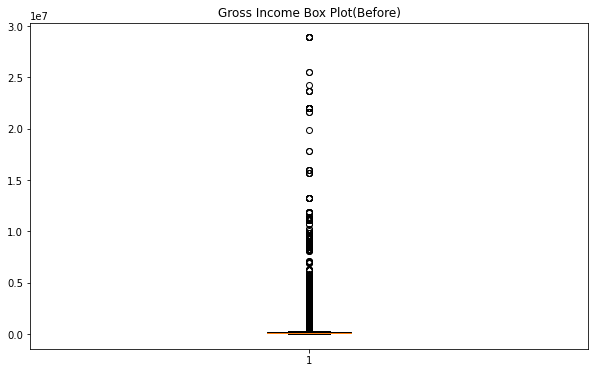

In [23]:
fig,ax = plt.subplots()

rects = ax.boxplot(df['Gross Income'])
fig.set_figheight(6)
fig.set_figwidth(10)

ax.set_title('Gross Income Box Plot(Before)')


plt.show()

Has many outliers and has to be removed.

##### Removing using z score method

In [24]:
df['Gross Income z score'] = np.abs(stats.zscore(df['Gross Income']))
threshold = 0.5
df = df[df['Gross Income z score'] < threshold]
df = df.drop(columns = ['Gross Income z score'])

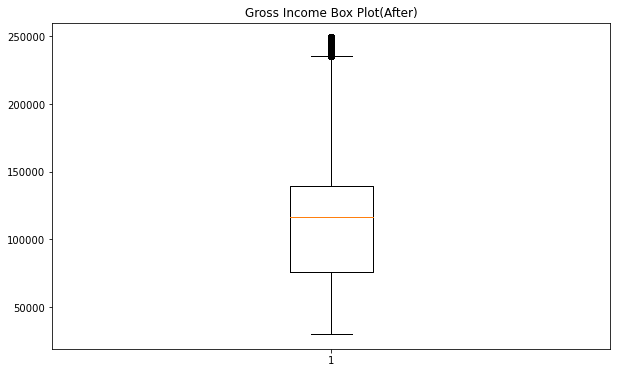

In [25]:
fig,ax = plt.subplots()

rects = ax.boxplot(df['Gross Income'])
fig.set_figheight(6)
fig.set_figwidth(10)

ax.set_title('Gross Income Box Plot(After)')


plt.show()

Now the Gross income column is balenced and most of the outliers have been eliminated. This process can be repeated to completely eliminate outliers from this column but I have decided that this should be sufficent for us moving forward.

#### Similarly for age column

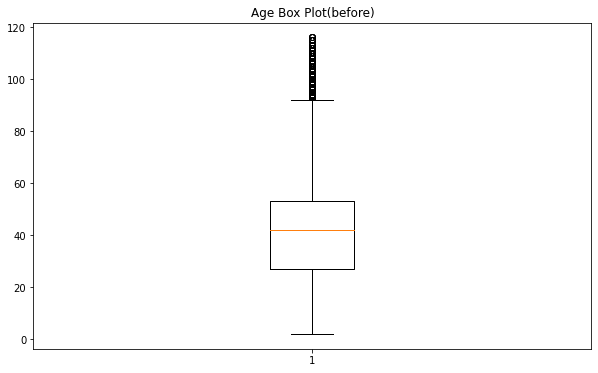

In [26]:
fig,ax = plt.subplots()

rects = ax.boxplot(df['Age'])
fig.set_figheight(6)
fig.set_figwidth(10)

ax.set_title('Age Box Plot(before)')

plt.show()

In [27]:
df['Age z score'] = np.abs(stats.zscore(df['Age']))
threshold = 2
df = df[df['Age z score'] < threshold]
df = df.drop(columns = ['Age z score'])

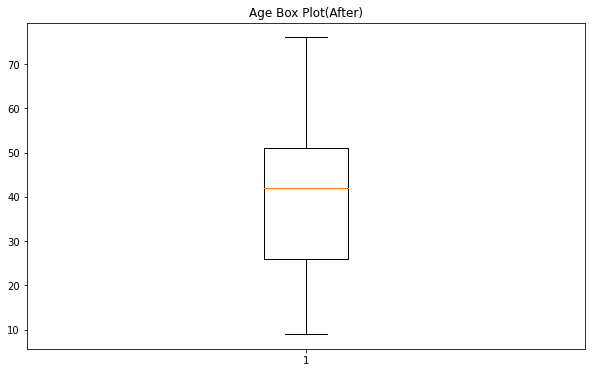

In [28]:
fig,ax = plt.subplots()

rects = ax.boxplot(df['Age'])
fig.set_figheight(6)
fig.set_figwidth(10)

ax.set_title('Age Box Plot(After)')

plt.show()

Outliers have been removed from age column.

In [29]:
df.head()

,Customer Code,Gender,Age,New Customer,Customer Seniority(months),Customer relation type,Channel joined,Province,Gross Income
0,1375586,F,35,0,6,A,KHL,MALAGA,87218.10000
1,1050611,M,23,0,35,I,KHE,CIUDAD REAL,35548.74000
2,1050612,M,23,0,35,I,KHE,CIUDAD REAL,122179.11000
3,1050613,F,22,0,35,I,KHD,ZARAGOZA,119775.54000
4,1050614,M,23,0,35,A,KHE,ZARAGOZA,139646.15094


Similarly for Customer Seniority

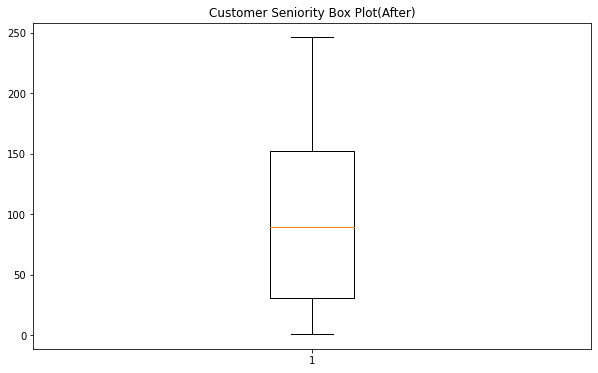

In [30]:
fig,ax = plt.subplots()

rects = ax.boxplot(df['Customer Seniority(months)'])
fig.set_figheight(6)
fig.set_figwidth(10)

ax.set_title('Customer Seniority Box Plot(After)')

plt.show()

Not many outliers present so no need to change the data.

In [31]:
#df.to_csv('dataset1.csv', index = False)